## data preprocessing

In [177]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib



In [179]:
path1 = r'D:\data science\datasets\archive (8)\diabetes_012_health_indicators_BRFSS2015.csv'
path2 = r'D:\data science\datasets\archive (8)\diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
path3 = r'D:\data science\datasets\archive (8)\diabetes_binary_health_indicators_BRFSS2015.csv'


In [180]:
df1 = pd.read_csv(path1)
df1.sample(20) # 20 rows random from dataframe

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
177887,0.0,1.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,7.0,4.0,7.0
28114,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,3.0
248414,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,3.0,6.0
48976,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,5.0,7.0
102433,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,0.0,0.0,5.0,6.0,7.0
73648,0.0,0.0,1.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,1.0,0.0,9.0,4.0,5.0
143710,2.0,1.0,1.0,1.0,37.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,10.0,4.0,4.0
251744,2.0,0.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,5.0,4.0
51726,0.0,1.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,14.0,0.0,1.0,3.0,3.0,8.0
69144,2.0,1.0,1.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,2.0,30.0,1.0,0.0,13.0,4.0,3.0


In [181]:
print(len(df1.columns))
df1.columns

22


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [182]:
df2 = pd.read_csv(path2)
df2.sample(7)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
50465,1.0,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,21.0,30.0,1.0,0.0,9.0,4.0,2.0
54316,1.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,4.0,4.0
39750,1.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0
23401,0.0,0.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,12.0,4.0,4.0
64476,1.0,0.0,1.0,1.0,39.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,21.0,0.0,0.0,10.0,6.0,7.0
35761,1.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,10.0,3.0,1.0,0.0,9.0,5.0,5.0
18651,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0


In [183]:
df3 = pd.read_csv(path3)
df3.sample(7)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31054,1.0,1.0,0.0,1.0,52.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,7.0
239246,0.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,5.0,0.0,0.0,13.0,5.0,8.0
244116,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
228956,0.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,4.0,7.0
69308,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
234359,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,10.0,6.0,8.0
5154,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,4.0,0.0,0.0,6.0,4.0,1.0


| Stage         | Dataset Used       | Purpose                                                                 | Target Variable     |
|---------------|--------------------|-------------------------------------------------------------------------|---------------------|
| **Training**  | `df2` (balanced)    | Tune hyperparameters on balanced data                                   | `Diabetes_binary`   |
| **Validation**| `df3` (imbalanced) | Final evaluation under real-world conditions                            | `Diabetes_binary`   |
| **Test**      | `df1` (3-class)  | Learn patterns across all clinical stages (Healthy/Prediabetes/Diabetes) | `Diabetes_012`      |

make the data with 3-classes just two classes

In [184]:
df1['Diabetes_binary'] = (df1['Diabetes_012'] >= 1).astype(int) 

In [185]:
df1.sample(7)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
21655,0.0,1.0,0.0,0.0,27.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0,0
5074,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0,0
29403,0.0,0.0,0.0,1.0,27.0,0.0,1.0,0.0,0.0,1.0,...,0.0,4.0,5.0,30.0,1.0,0.0,13.0,4.0,5.0,0
200494,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,10.0,1.0,0.0,13.0,5.0,5.0,0
191760,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0,0
81552,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,4.0,0.0,15.0,0.0,0.0,12.0,5.0,6.0,0
102393,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,21.0,0.0,0.0,10.0,4.0,6.0,0


In [186]:
print(df1.columns)
print(len(df1.columns))


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')
23


In [187]:
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0


In [188]:
# Ensure all feature sets match across datasets
common_features = list(set(df1.columns) & set(df2.columns) & set(df3.columns) - {'Diabetes_012', 'Diabetes_binary'})

In [189]:
len(set(df1.columns))

23

In [190]:
len(common_features)

21

In [191]:
y = df1['Diabetes_binary']
x = df1.drop(columns = ['Diabetes_012', 'Diabetes_binary'])
display(y)
display(x)


0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 253680, dtype: int32

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [192]:
df1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.157588
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.364355
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


## data cleaning

In [193]:
df2.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [194]:
df3.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [195]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [196]:
len(df1)

253680

In [197]:
df1['HighChol'].value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

In [198]:
df1['Sex'].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [199]:
df1['HighChol'].unique()

array([1., 0.])

In [200]:
type(df1['HighChol'].unique())

numpy.ndarray

In [201]:
uniques = df1['Age'].unique().sort



In [202]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())



23899
1635
24206


remove the  column diabetes_012

In [203]:
df1.drop(columns = ['Diabetes_012'], inplace = True )

after removing the 3_classes column

In [204]:
df1.duplicated().sum()

23968

In [205]:
df1[df1.duplicated()]


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1242,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0,1
1563,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,0
2700,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0,0
3160,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,0
3332,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0,1
253550,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,0
253563,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0,0
253597,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0,0


In [206]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)


In [207]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())




0
0
0


#### check missing

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


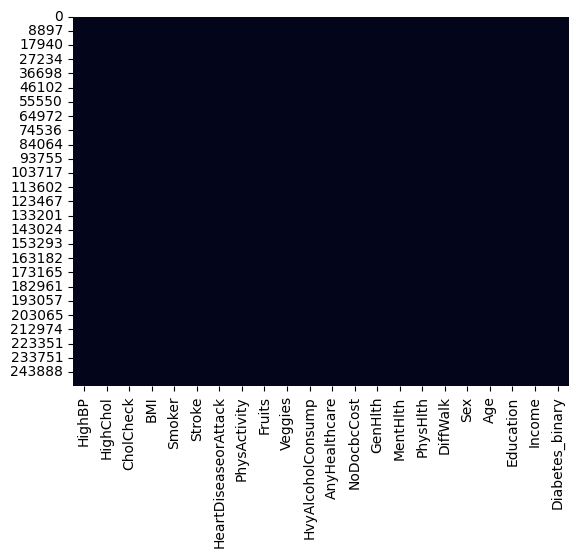

In [208]:
# Check missing values per column
print(df1.isnull().sum())

# Visualize missingness 
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [209]:
print(df2.isnull().sum())
print(df3.isnull().sum())


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0

#### handles the outliers in numerical columns like BMI

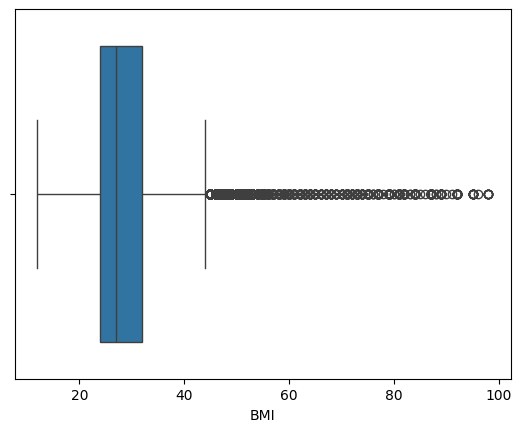

In [210]:
# Boxplot for numerical columns 
sns.boxplot(x=df1['BMI'])
plt.show()

In [211]:
# Calculate the 99th percentile BMI value - this means 99% of the data falls below this value
bmi_cap = df1['BMI'].quantile(0.99)  
# Cap (limit) all BMI values at this 99th percentile - any values above it will be reduced to this cap
df1['BMI'] = df1['BMI'].clip(upper=bmi_cap)


In [212]:
bmi_low = df1['BMI'].quantile(0.01) # Calculate the 1th percentile BMI value - this means 1% of the data falls below this value
df1['BMI'] = df1['BMI'].clip(lower=bmi_low)

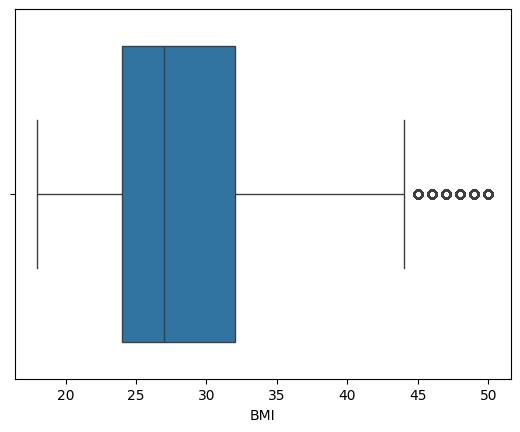

In [213]:
# Boxplot for numerical columns 
sns.boxplot(x=df1['BMI'])
plt.show()

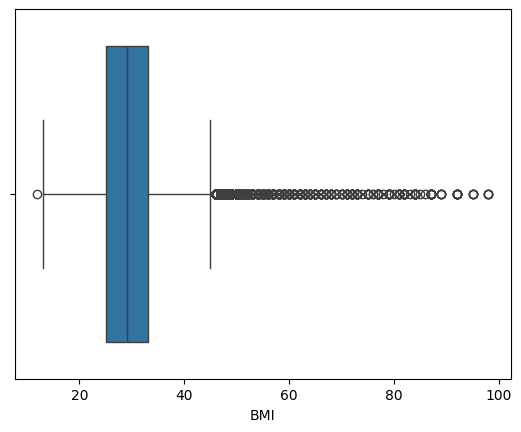

In [214]:
sns.boxplot(x = df2['BMI'])
plt.show()

In [215]:
bmi_cap = df2['BMI'].quantile(0.99)
bmi_low = df2['BMI'].quantile(0.01)
df2['BMI'] = df2['BMI'].clip(upper = bmi_cap, lower= bmi_low)

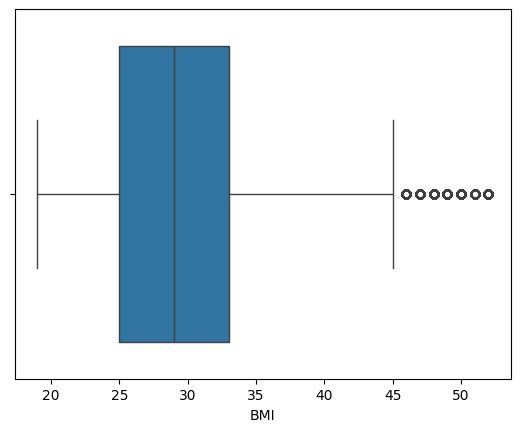

In [216]:
sns.boxplot(x = df2['BMI'])
plt.show()

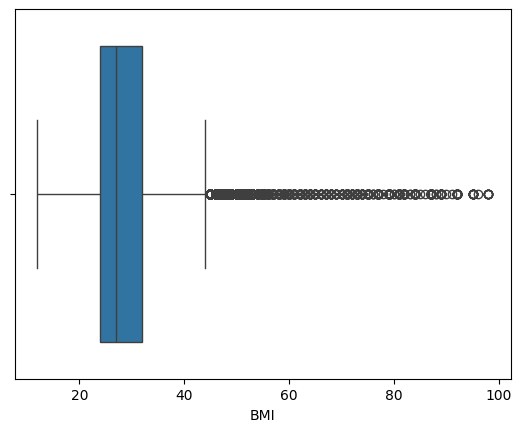

In [217]:
sns.boxplot(x = df3['BMI'])
plt.show()

In [218]:
bmi_cap = df3['BMI'].quantile(0.99)
bmi_low = df3['BMI'].quantile(0.01)
df3['BMI'] = df3['BMI'].clip(upper = bmi_cap, lower= bmi_low)

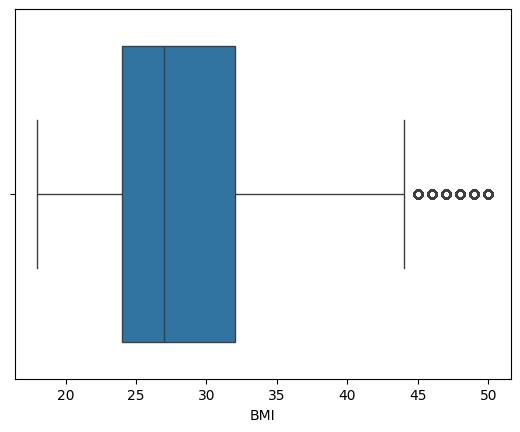

In [219]:
sns.boxplot(x = df3['BMI'])
plt.show()

In [220]:
print(df1[df1['MentHlth'] > 30]['MentHlth'].count())

0


In [221]:
# Verify no missing values remain
print(df1.isnull().sum())

# Check descriptive stats
print(df1.describe())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64
              HighBP       HighChol      CholCheck            BMI  \
count  229712.000000  229712.000000  229712.000000  229712.000000   
mean        0.454378       0.441697       0.959523      28.579500   
std         0.497915       0.496590       0.197075       6.171792   
min         0.000000       0.000000       0.000000      18.000000   
25%         0.000000       0.000000       1.000000      24.000000   
5

In [222]:
# Verify no missing values remain
print(df2.isnull().sum())

# Check descriptive stats
print(df2.describe())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     69057.000000  69057.000000  69057.000000  69057.000000   
mean          0.508232      0.571224      0.531329      0.974803   
std           0.499936      0.494905      0.499021      0.156723   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%    

## visualization

<Axes: >

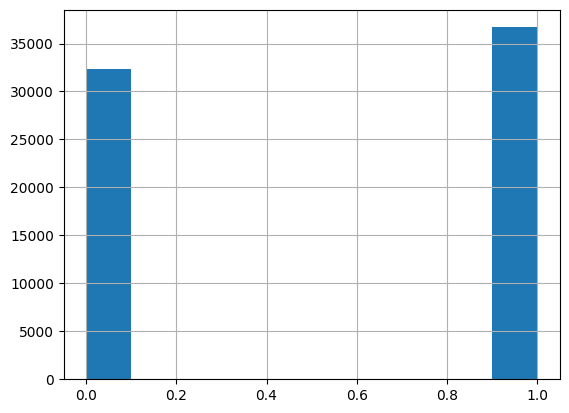

In [223]:
df2['HighChol'].hist()


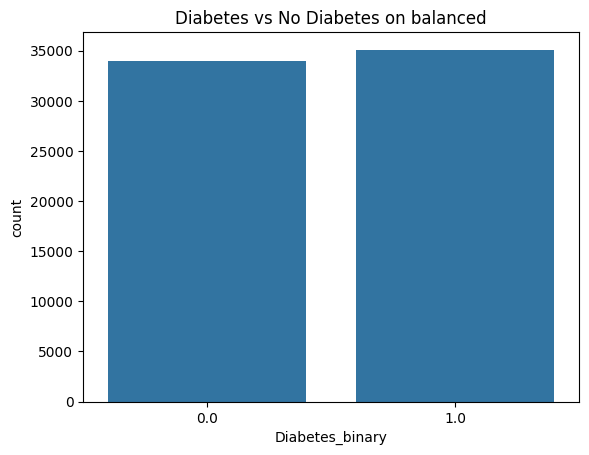

In [224]:
sns.countplot(x='Diabetes_binary', data=df2)
plt.title('Diabetes vs No Diabetes on balanced')
plt.show()

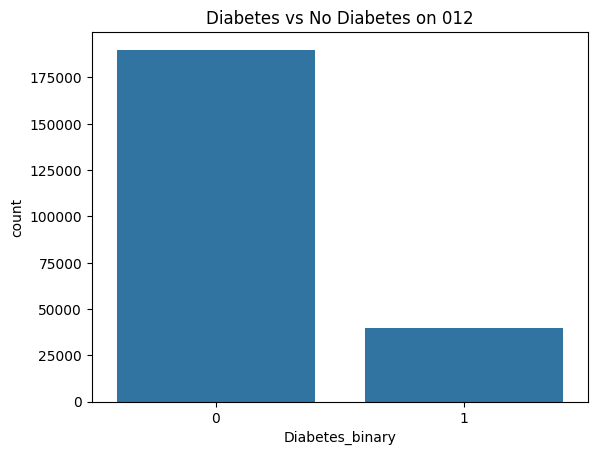

In [225]:
sns.countplot(x='Diabetes_binary', data=df1)
plt.title('Diabetes vs No Diabetes on 012')
plt.show()

to get the precentage of the number of people who have the disease

.value_counts() returns the biggest first 

In [226]:
a1,a2 = df2['Diabetes_binary'].value_counts()
print(f'the percentage of of people who have the disease =   {((a1/(a2+a1))*100):.2f}%')


the percentage of of people who have the disease =   50.82%


In [227]:
a1,a2 = df1['Diabetes_binary'].value_counts()
print((a2/(a1+a2))*100)

17.26379118200181


then the diabetes precenteage is 17%

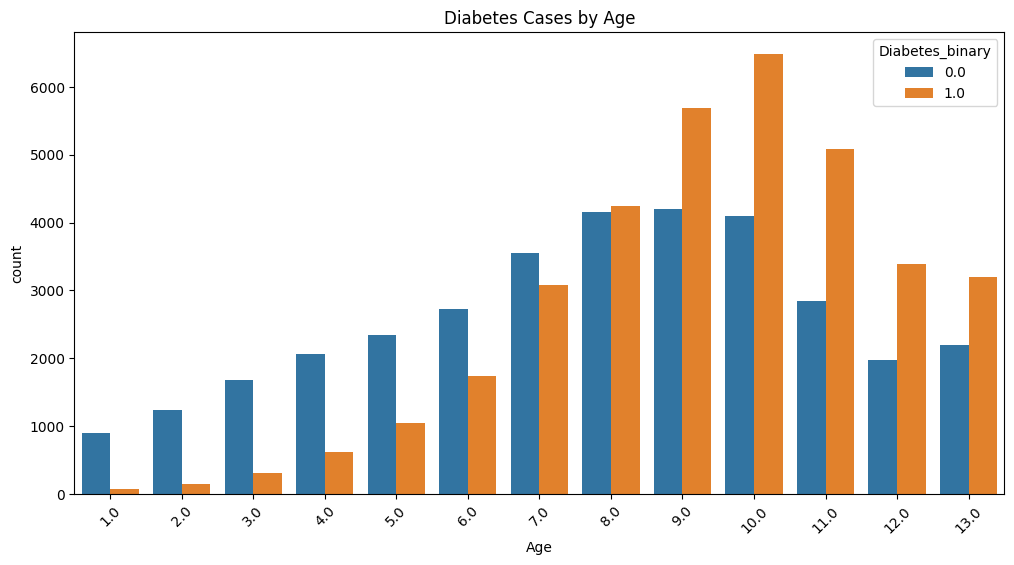

In [228]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Diabetes_binary', data=df2) # hue used to color to another column
plt.title('Diabetes Cases by Age')
plt.xticks(rotation=45)
plt.show()

#### from this 
1. most pepole in this dataset are in age 65-69
2. the percentage of Diabetic patients is max in age 65-69 

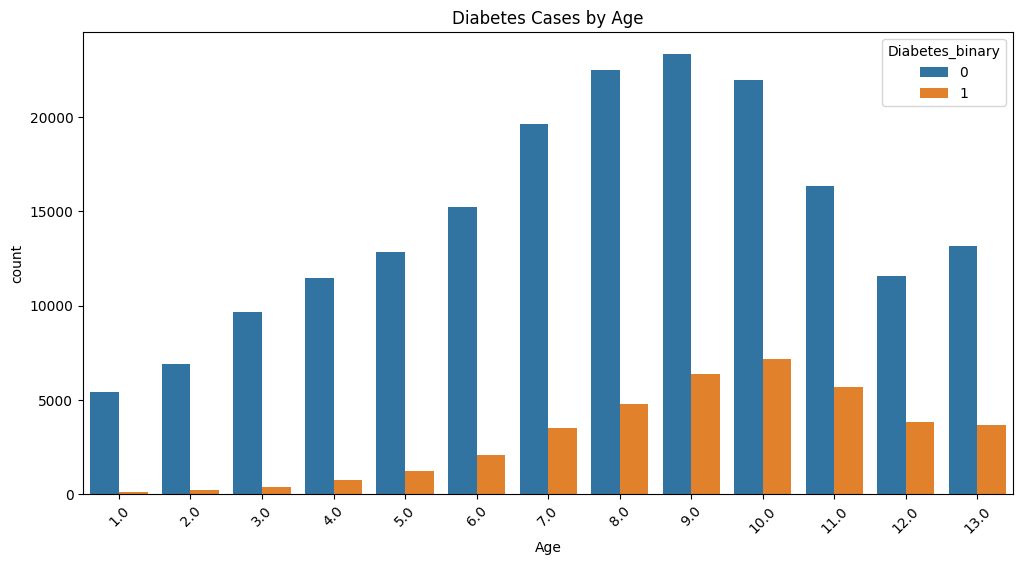

In [229]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Diabetes_binary', data=df1) # hue used to color to another column
plt.title('Diabetes Cases by Age')
plt.xticks(rotation=45)
plt.show()

#### from this 
1. most pepole in this dataset are in age 60-64
2. the percentage of Diabetic patients is max in age 65-69 

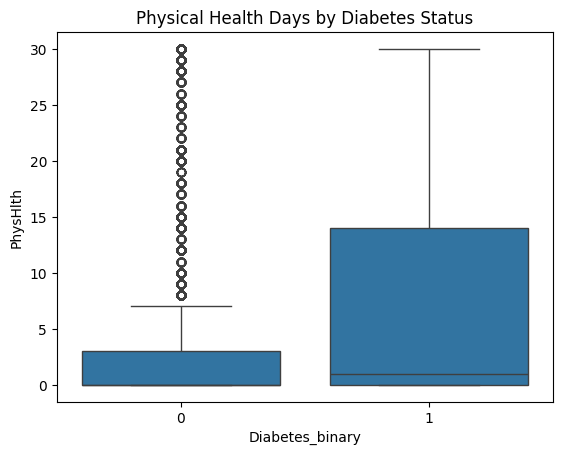

In [230]:
# Physical Health Days
sns.boxplot(x='Diabetes_binary', y='PhysHlth', data=df1)
plt.title('Physical Health Days by Diabetes Status')
plt.show()


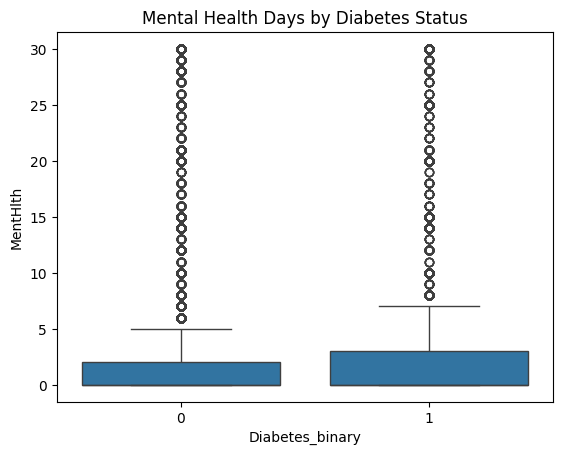

In [231]:
# Mental Health Days
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=df1)
plt.title('Mental Health Days by Diabetes Status')
plt.show()

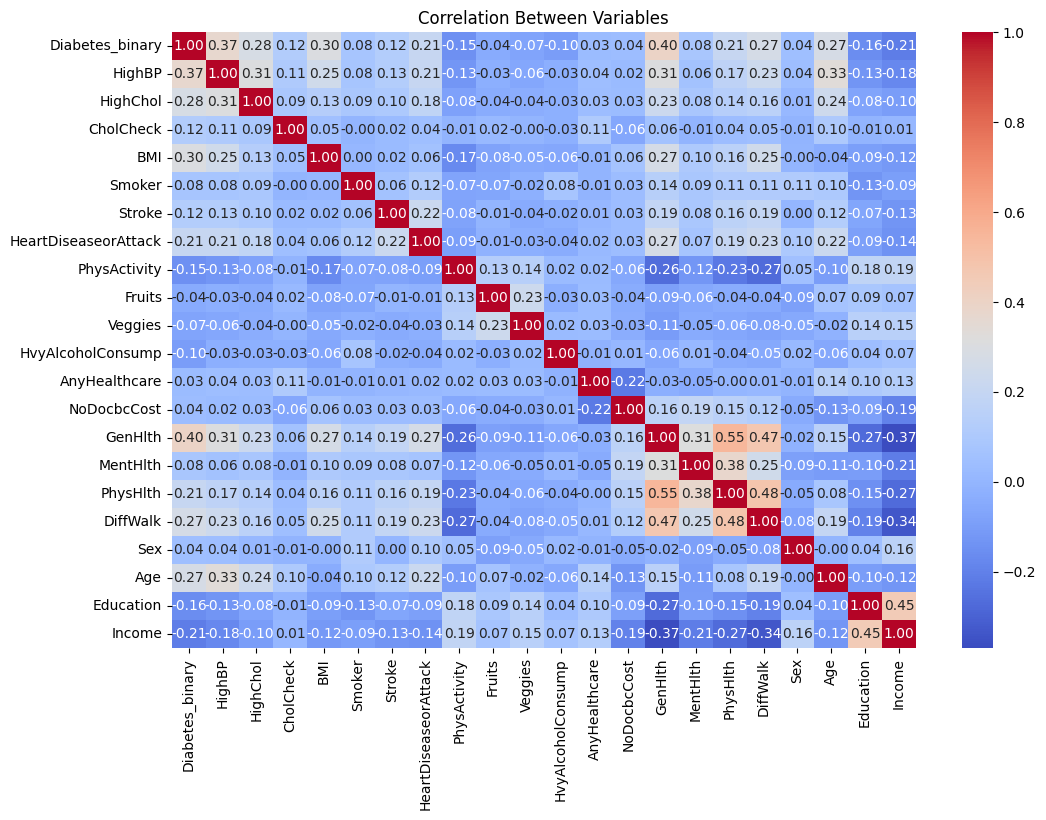

In [232]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.show()

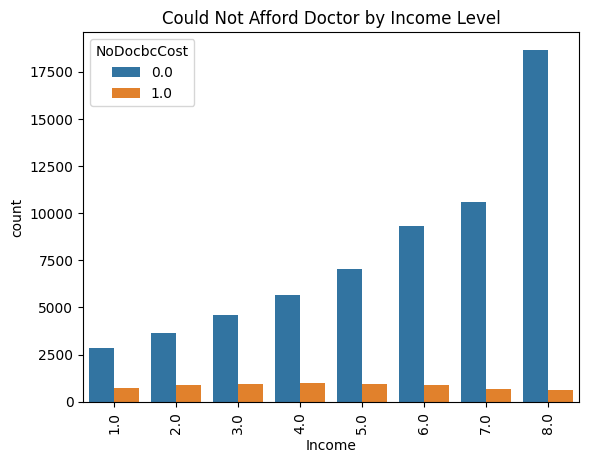

In [233]:
sns.countplot(x='Income', hue='NoDocbcCost', data=df2)
plt.title('Could Not Afford Doctor by Income Level')
plt.xticks(rotation=90)
plt.show()

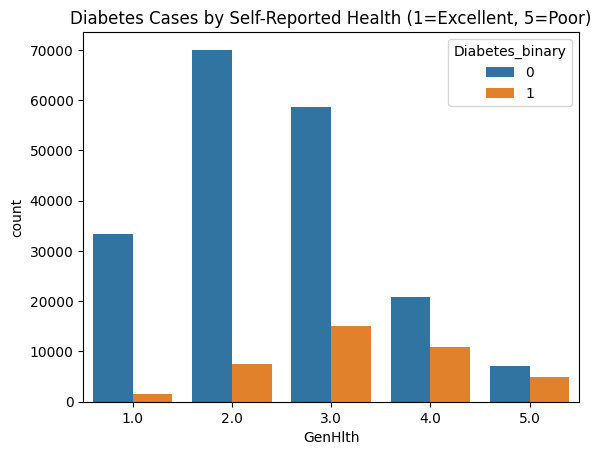

In [234]:
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df1)
plt.title('Diabetes Cases by Self-Reported Health (1=Excellent, 5=Poor)')
plt.show()

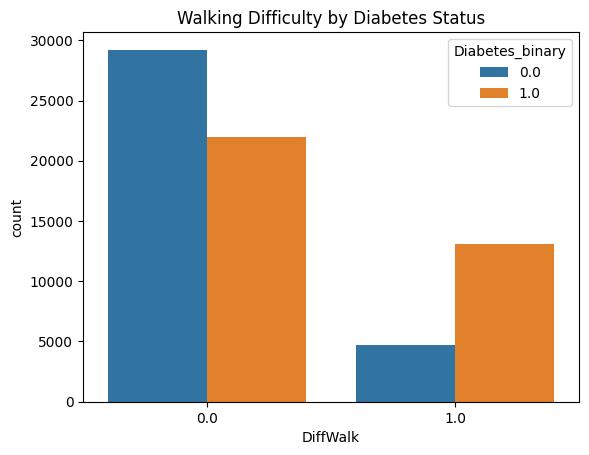

In [235]:
sns.countplot(x='DiffWalk', hue='Diabetes_binary', data=df2)
plt.title('Walking Difficulty by Diabetes Status')
plt.show()

## combine the 3 datasets

In [236]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.sample(15)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
207483,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0,0.0
15045,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0,0.0
339216,1.0,1.0,1.0,32.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,4.0,25.0,30.0,1.0,0.0,11.0,6.0,5.0,1.0
226085,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,10.0,5.0,6.0,0.0
525263,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,1.0,1.0,10.0,5.0,2.0,0.0
149041,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,10.0,20.0,0.0,1.0,12.0,5.0,3.0,1.0
326658,1.0,1.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,12.0,4.0,3.0,1.0
158877,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,0.0
263919,0.0,0.0,1.0,39.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,3.0,2.0,0.0,0.0,0.0,5.0,6.0,7.0,1.0
261271,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0,0.0


In [237]:
df = shuffle(df, random_state=42)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
305188,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,4.0,5.0,8.0,0.0
190859,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,1.0,10.0,0.0,1.0,13.0,6.0,7.0,0.0
421681,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,1.0,0.0,0.0,8.0,5.0,7.0,0.0
349326,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,2.0,0.0,0.0,9.0,6.0,7.0,0.0
218852,1.0,1.0,1.0,34.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,1.0,6.0,3.0,7.0,0.0


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528243 entries, 305188 to 121958
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                528243 non-null  float64
 1   HighChol              528243 non-null  float64
 2   CholCheck             528243 non-null  float64
 3   BMI                   528243 non-null  float64
 4   Smoker                528243 non-null  float64
 5   Stroke                528243 non-null  float64
 6   HeartDiseaseorAttack  528243 non-null  float64
 7   PhysActivity          528243 non-null  float64
 8   Fruits                528243 non-null  float64
 9   Veggies               528243 non-null  float64
 10  HvyAlcoholConsump     528243 non-null  float64
 11  AnyHealthcare         528243 non-null  float64
 12  NoDocbcCost           528243 non-null  float64
 13  GenHlth               528243 non-null  float64
 14  MentHlth              528243 non-null  float64
 15  

In [239]:
len(df)

528243

In [240]:
df.dropna(inplace=True)

In [241]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


292748
0


In [242]:
len(df)

235495

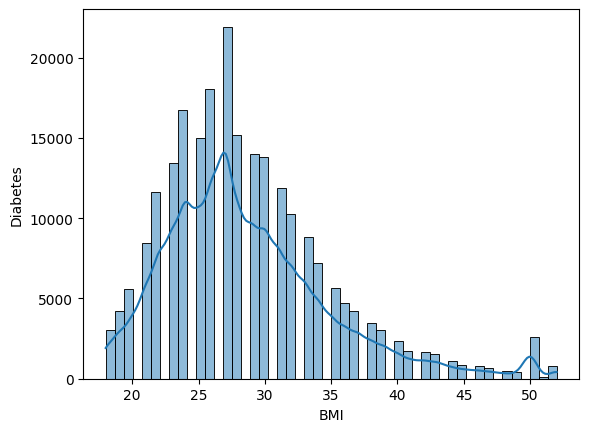

In [243]:
sns.histplot(df['BMI'],bins=50,kde=True)
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.show()

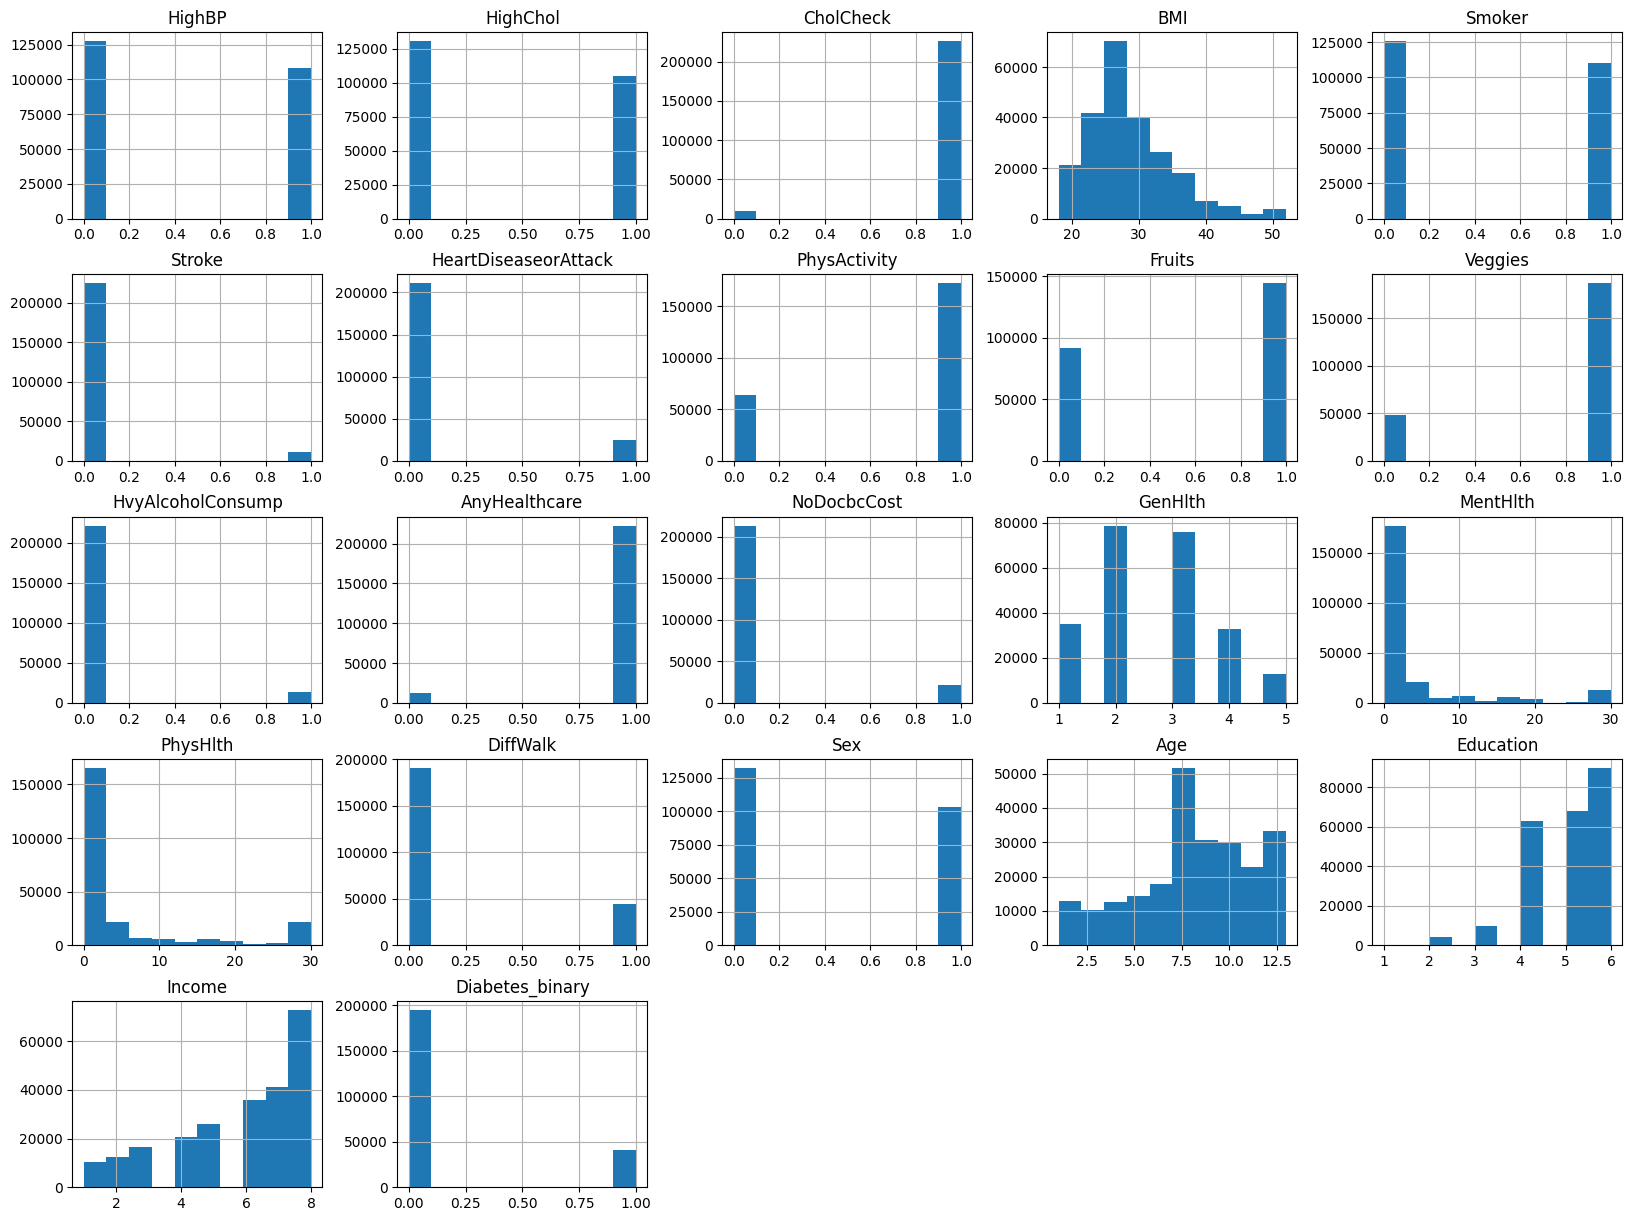

In [244]:

df.hist(figsize=(20,15));

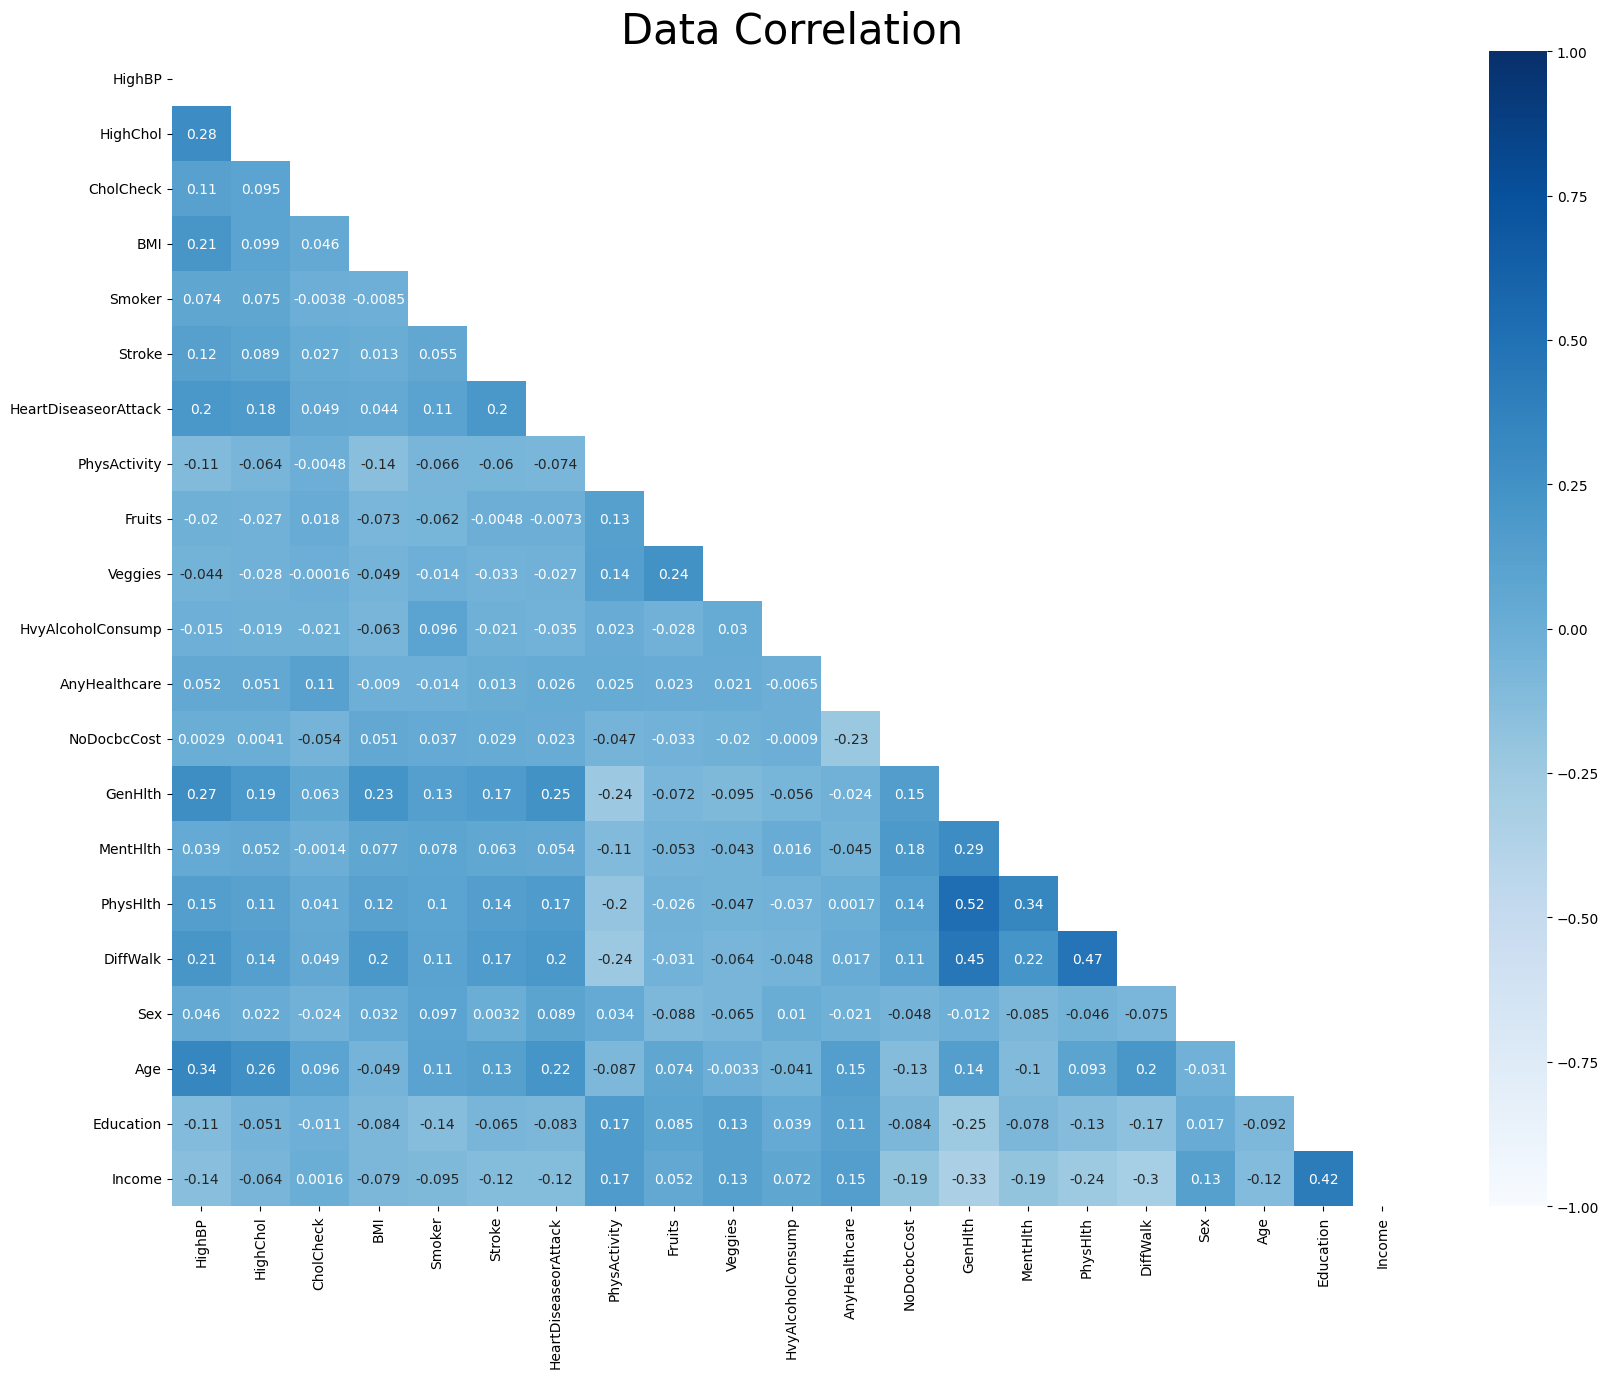

In [245]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['Diabetes_binary']).corr()))
sns.heatmap(df.drop(columns=['Diabetes_binary']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize =30)
plt.show()

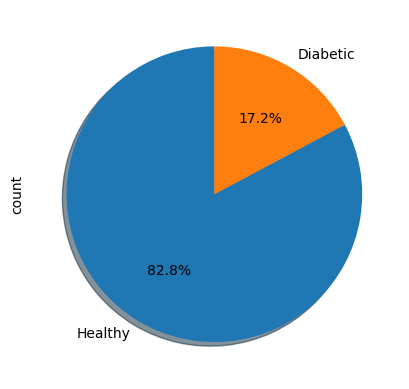

In [246]:
labels = 'Healthy','Diabetic'

df.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

## implement the random forest

In [247]:
a1,a2 = df['Diabetes_binary'].value_counts()
print(a2/(a1+a2)*100)


17.21013184993312


In [248]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df["Diabetes_binary"]

In [249]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [250]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


#### **Plot the class distribution before resampling**

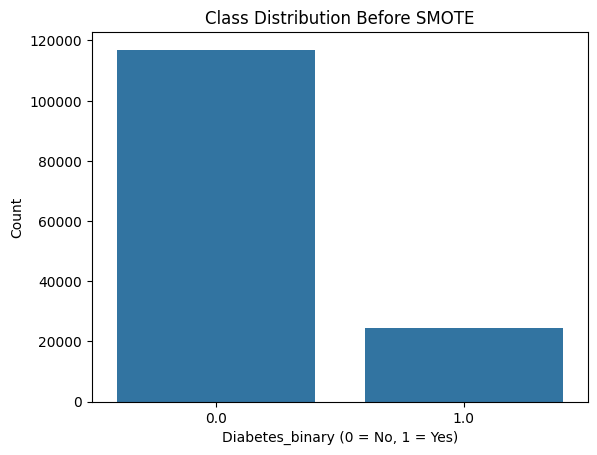

In [251]:
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Diabetes_binary (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### make the lowest class bigger

In [252]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


#### **Plot the class distribution after resampling**

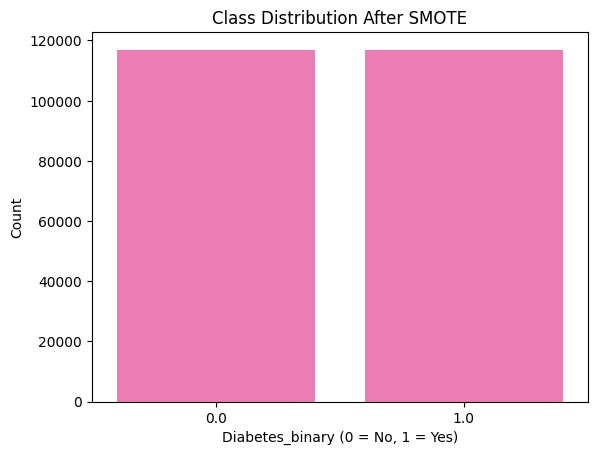

In [253]:
sns.countplot(x=y_train_resampled,color="hotpink")
plt.title('Class Distribution After SMOTE')
plt.xlabel('Diabetes_binary (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## the XGBClassifier model

In [254]:
param_grid_xgb = {
    'n_estimators': [50, 100,120,150, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [255]:
xgb_model = XGBClassifier(random_state=42)

In [256]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [257]:
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 120, 150, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [258]:
joblib.dump(grid_search_xgb, 'depi_xgb.pkl')

['depi_xgb.pkl']

In [259]:
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best score for XGBoost: ", grid_search_xgb.best_score_)

Best parameters for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best score for XGBoost:  0.8696105710486804


In [260]:
best_xgb_model = grid_search_xgb.best_estimator_

In [261]:
xgb_pred = best_xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38993
         1.0       0.57      0.21      0.30      8106

    accuracy                           0.84     47099
   macro avg       0.71      0.59      0.61     47099
weighted avg       0.81      0.84      0.80     47099



<function matplotlib.pyplot.show(close=None, block=None)>

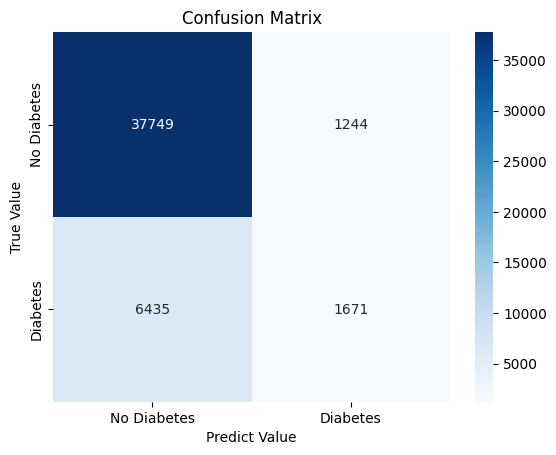

In [262]:
data = confusion_matrix(y_test, xgb_pred)
label = ['No Diabetes','Diabetes']
sns.heatmap(data, annot=True, fmt='d', xticklabels = label, yticklabels = label, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict Value')
plt.ylabel('True Value')
plt.show